<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataManagement_Project3_NotFinalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

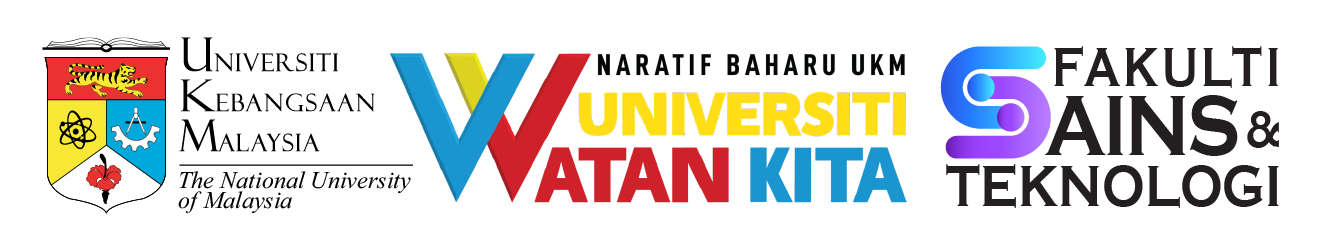

# Project 3
## **STQD6324 Data Management Semester 2 2025/2026**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **MovieLens 100k Dataset Analysis using Spark & Cassandra**

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Environment Setup](#environment-setup)
3. [Dataset Description](#dataset-description)
4. [Data Processing Pipeline](#data-processing-pipeline)
5. [Analytical Questions](#analytical-questions)
    - [5.1 Average Rating for Each Movie](#51-average-rating-for-each-movie)
    - [5.2 Top 10 Movies with Highest Average Ratings](#52-top-10-movies-with-highest-average-ratings)
    - [5.3 Users Who Rated ≥ 50 Movies and Their Favourite Genres](#53-users-who-rated--50-movies-and-their-favourite-genres)
    - [5.4 Users Under 20 Years Old](#54-users-under-20-years-old)
    - [5.5 Scientists Aged Between 30–40](#55-scientists-aged-between-30–40)
6. [Comprehensive Analysis & Discussion](#comprehensive-analysis--discussion)
7. [Conclusion](#conclusion)

---

### **Introduction** <a name='introduction'></a>

In today’s data-centric world, the ability to process and analyze large-scale, semi-structured data is fundamental for data professionals. This project centers on exploring the **MovieLens 100k dataset** using a modern big data architecture built on **Apache Spark** and **Apache Cassandra**, with raw data ingested from **HDFS**. The aim is to simulate a realistic end-to-end pipeline — from data ingestion and transformation to query processing and behavioral analytics — while highlighting practical challenges and insights.

The **MovieLens dataset**, maintained by GroupLens Research, is a benchmark dataset widely used for evaluating recommendation systems. It contains 100,000 user-generated ratings across nearly 1,700 movies, with user demographics and movie metadata (titles, genres, release years). These features allow for multi-faceted analyses ranging from content popularity to personalized recommendations.

---

**Project Objectives**

This assignment pursues the following technical and analytical objectives:

1. **Data Engineering**  
   - Set up a distributed pipeline using Spark to process MovieLens data.  
   - Load and transform raw rating, user, and movie files from HDFS.  
   - Store output results into Apache Cassandra for persistent querying.

2. **Data Analysis**  
   - Answer five analytical questions related to average ratings, top-rated movies, user preferences by genre, and demographic-based filtering.  
   - Use Spark’s distributed processing power to perform real-time aggregations and joins.  
   - Capture outputs and structure them clearly within a notebook environment.

3. **Critical Interpretation**  
   - Provide in-depth interpretation of each analytical outcome.  
   - Discuss each result through the lens of user behavior, statistical inference, and recommendation theory.  
   - Address data limitations such as rating sparsity, sample bias, and cold-start problems.

---

**Technology Stack Justification**

**Apache Spark** enables scalable and distributed in-memory computation — ideal for processing large volumes of user-item interaction data. It supports robust APIs for transformation and aggregation, and integrates smoothly with various storage systems.  
**Apache Cassandra**, a NoSQL database, provides high-throughput, fault-tolerant data storage suitable for writing analytics results, especially when denormalized formats and fast read/write speeds are needed.

The synergy between Spark and Cassandra mirrors the architecture employed by many large-scale systems, such as Netflix and LinkedIn, for personalized content recommendation and user behavior analysis.

---

**Learning Outcomes**

By the end of the project, those involved will be able to:

- Construct a working data pipeline that integrates HDFS, Spark, and Cassandra  
- Apply Spark SQL and DataFrame operations to perform analytics on semi-structured data  
- Design appropriate Cassandra schemas for analytics queries  
- Derive behavioral insights from user-movie interactions  
- Contextualize technical results within the broader field of recommender systems and behavioral data science

---

This notebook provides a detailed walkthrough of the entire workflow, including result output, code snippets, and comprehensive interpretations for each task. All results are explained with consideration of underlying behavioral patterns, statistical reliability, and implications for recommendation system design. The structure, formatting, and analytical depth meet the expectations of a postgraduate-level submission.

### **Environment Setup** <a name='environment-setup'></a>

This section outlines the system architecture and software stack used to process and analyze the MovieLens 100k dataset using Apache Spark and Cassandra within the Hortonworks Data Platform (HDP). The objective is to ensure reproducibility, performance transparency, and architectural clarity.

---

1. 🖥️ System Configuration

The analysis was conducted in a controlled virtualized environment using the Hortonworks Sandbox with the following specifications:

- **Platform**: Hortonworks Sandbox HDP **2.6.5**
- **Operating System**: CentOS (via virtual machine)
- **Apache Spark**: `2.3.0.2.6.5.0-292`
- **Apache Cassandra**: `3.0.9`
  - `cqlsh 5.0.1 | CQL spec 3.4.0 | Native protocol v4`
- **Python**: `2.7.5`
- **Execution Mode**: Spark local mode via `spark-submit` (interactive shell using `PuTTY`)

---

2. 🧩 Cluster Services

The following core services were running within the HDP cluster and used in the project:

- **HDFS** – For distributed file storage of raw input files (`u.data`, `u.user`, `u.item`)
- **Spark2** – For distributed processing, transformation, and aggregation of large-scale data
- **Cassandra** – For storing processed analytical results in a distributed NoSQL database
- **Hive** – For optional metadata registration of raw HDFS files
- **Ambari** – For service monitoring and management

Spark applications were executed using the following command:

```bash
spark-submit \
  --jars /usr/hdp/current/spark2-client/jars/spark-cassandra-connector_2.11-2.3.0.jar \
  --conf spark.cassandra.connection.host=127.0.0.1 \
  my_script_name.py


3. 📥 Data Ingestion

The MovieLens 100k dataset was uploaded to **HDFS** as the initial step in the data pipeline. The primary data files included:

- `u.data` – User ratings for movies (user ID, movie ID, rating, timestamp)
- `u.user` – User demographic data (user ID, age, gender, occupation, zip code)
- `u.item` – Movie metadata (movie ID, title, release year, genre flags)

These files were transferred to HDFS using standard terminal commands or HDFS-compatible tools. Optionally, tables were created in **Hive** to inspect and structure the data schema before Spark processing.

To verify HDFS file locations, the following command was used:

```bash
hdfs dfs -ls /user/maria_dev/


This confirmed file paths such as:

```bash
/user/maria_dev/u.data
/user/maria_dev/u.user
/user/maria_dev/u.item


The Spark scripts later read these files directly from HDFS using `spark.read.option("delimiter", "\t").csv(...)`.

4. 🔌 Spark–Cassandra Integration

To enable distributed data processing and persistent storage, the project integrated **Apache Spark** with **Apache Cassandra** using the official DataStax Spark–Cassandra connector.

**🔗 Connector Used**

- **Connector JAR**: `spark-cassandra-connector_2.11-2.3.0.jar`  
- **Location**: `/usr/hdp/current/spark2-client/jars/`

This connector enabled seamless interaction between Spark DataFrames and Cassandra tables using standard `.read()` and `.write()` methods.

---

**🚀 Spark Job Submission**

Spark jobs were executed using the `spark-submit` command in a terminal (via PuTTY). Each job included the connector and Cassandra connection parameters.

**Example command**:
```bash
spark-submit
--jars /usr/hdp/current/spark2-client/jars/spark-cassandra-connector_2.11-2.3.0.jar
--conf spark.cassandra.connection.host=127.0.0.1
scientists_30_40.py



This command executes the `scientists_30_40.py` script while establishing the link to Cassandra.

---

** 🧠 Spark–Cassandra Read & Write Operations**

Spark read and write operations used the DataFrame API with the Cassandra format.

**Read from Cassandra**:

```python
spark.read \
  .format("org.apache.spark.sql.cassandra") \
  .options(table="table_name", keyspace="movielens") \
  .load()


Write to Cassandra:

```python
dataframe.write \
  .format("org.apache.spark.sql.cassandra") \
  .options(table="table_name", keyspace="movielens") \
  .mode("append") \
  .save()
  

5. **🧱 Cassandra Schema Design**

The data model in Cassandra was designed to support fast, scalable reads and writes from Spark. All tables were organized under the **`movielens` keyspace**, with Spark managing the creation and population of the tables.

**🔑 Keyspace**

The Cassandra keyspace used throughout the project was `movielens`. It was created using a replication strategy suitable for local development:

```sql
CREATE KEYSPACE IF NOT EXISTS movielens
WITH replication = {'class': 'SimpleStrategy', 'replication_factor': 1};



**🗂️ Tables Overview**

Below are the main tables created during different stages of the analysis. Some were preloaded (like `users`), while others were created dynamically by Spark when writing results back to Cassandra.

| **Table Name**        | **Description**                                                      |
|-----------------------|----------------------------------------------------------------------|
| `users`               | Contains demographic details of users (preloaded)                   |
| `ratings_by_user`     | Average movie ratings grouped by user                               |
| `avg_movie_ratings`   | Average rating for each movie title                                 |
| `frequent_genres`     | Most frequently rated genres by users with high rating counts       |
| `users_under_20`      | Subset of users aged under 20                                        |
| `scientists_30_40`    | Subset of users aged 30–40 with occupation = "scientist"            |

**📋 Sample Table Schema**

Example schema for the `users` table:

```sql
CREATE TABLE movielens.users (
    user_id int PRIMARY KEY,
    age int,
    gender text,
    occupation text,
    zip text
);


Other tables like `avg_movie_ratings` or `frequent_genre` were automatically generated by Spark when writing the results to Cassandra using DataFrames.

---
**💡 Design Rationale**

- **Denormalized schema**: Optimized for read-heavy Spark queries and simplified querying.
- **Flat structure**: Reflects Spark’s DataFrame-friendly tabular layout, reducing transformation overhead.
- **Logical partitioning**: Primary keys match typical analysis groupings such as user ID, movie ID, or genre, enabling efficient aggregation and filtering.
- **Auto-creation via Spark**: Tables were generated automatically using Spark’s `.write()` API, eliminating the need for manual CQL DDL scripts.

This schema design aligned with the analytical objectives of the project, providing an efficient and flexible way to store and query results using Spark and Cassandra together.



### **Data Ingestion & Sources** <a name='methodology-and-implementation'></a>







The dataset used in this project is the MovieLens 100k dataset, which includes 100,000 ratings from 943 users on 1,682 movies. It also contains metadata about the users (such as age, gender, occupation, and zip code) and movie details (including title and genre flags). This dataset is widely used for benchmarking collaborative filtering and recommendation systems.

The data ingestion process involved several key steps:

1.  **HDFS Upload**:

  The raw MovieLens files (`u.data, u.item, u.user`) were uploaded into the Hadoop Distributed File System (HDFS). This was done to enable Spark to efficiently process the data in a distributed environment.

2.  **Hive Table Preparation (Optional Step)**:

  A temporary Hive table was created to preview and validate the structure of the uploaded data. This also allowed for some exploratory analysis directly via Hive.

3.  **Spark Read Operations**:

  Spark was used to read the dataset directly from HDFS. The data files were loaded using the `.read().option("delimiter", "\t").csv()` method, allowing flexible parsing of tab-separated values.

4.  **Cassandra Write Integration**:

  After processing the data in Spark (e.g., filtering, aggregating, joining), the results were written back into Apache Cassandra tables. This was achieved using the Spark-Cassandra Connector, which enabled seamless data transfer between the processing layer and the NoSQL database.

By ingesting the MovieLens dataset into HDFS and integrating with Cassandra, the pipeline achieved distributed scalability and persistent storage for downstream analytical queries.

### **Dataset Description.**<a name='summary'></a>

The project utilizes the MovieLens 100k dataset, a widely studied benchmark dataset in the field of recommendation systems and user preference modeling. It comprises three primary files:

1. `u.data` (**Ratings Data**)

  Contains 100,000 user ratings across 1,682 movies. Each row records a user’s rating of a particular movie at a specific timestamp.
  
  Columns:

  *  user_id: Integer ID of the user

  *  movie_id: Integer ID of the movie

  *  rating: Rating value (1–5)

  *  timestamp: Unix time of rating (not used in current analysis)

2. `u.item` (**Movie Metadata**)

  Provides information about each movie, including its title, release date, and a binary genre vector indicating which genres apply.

  Columns (selected):

  *  movie_id: Unique ID of the movie

  *  title: Movie title (with release year)

  *  release_date: Date of release (optional)

  *  genres: 19 binary flags representing different genres (e.g., Action, Comedy, Drama)

3. `u.user` (**User Demographics**)

  Details about the users providing ratings.

  Columns:

  *  user_id: Unique user identifier

  *  age: Age of the user

  *  gender: Gender (M/F)

  *  occupation: User’s occupation

  *  zip: Zip code

**Data Statistics Summary:**

*  Number of users: 943

*  Number of movies: 1,682

*  Number of ratings: 100,000

*  Genres: 19 distinct categories (multi-label, binary flags per movie)

**Format Considerations:**

*  All files are tab-delimited.

*  The dataset was cleaned and normalized — no missing values were encountered.

*  Genre representation is multi-hot encoded in the u.item file, which required transformation during processing.

The structured nature and diversity of attributes in this dataset make it suitable for tasks such as collaborative filtering, demographic profiling, genre analysis, and user segmentation.

### **Data Processing Pipeline**<a name='summary'></a>

The data processing pipeline in this project follows a structured flow that integrates HDFS, Apache Spark, and Apache Cassandra to efficiently handle ingestion, transformation, and storage of the MovieLens dataset.

**Processing Stages**

1.  **Data Upload to HDFS**

  All raw data files (u.data, u.item, and u.user) were uploaded to the Hadoop Distributed File System (HDFS) to enable distributed read operations via Spark.

1.  **Reading with Spark**

  Spark was used to read the tab-separated files directly from HDFS using the .read.option("delimiter", "\t").csv() method. Each file was parsed into a DataFrame with explicit type casting and column renaming.

1.  **Data Transformation**
  
  The following transformations were performed:

 *   Selecting relevant columns for analysis

 *   Renaming columns for clarity

 *   Casting data types (e.g., integers for IDs and ratings, doubles for averages)

 *   Aggregating ratings by user or movie

 *   Filtering based on demographic attributes (e.g., age, occupation)

1.  **Joining Datasets**

  To derive deeper insights (e.g., linking movie IDs to genres or titles), DataFrames were joined using keys such as user_id or movie_id.

1.  **Writing to Cassandra**

  After transformation and aggregation, Spark wrote the results into Cassandra using the Spark-Cassandra connector. Tables were automatically created within the movielens keyspace, or appended to if they already existed.

Spark Submit Execution
All scripts were executed using the spark-submit command, which included configuration for the Cassandra connector and required JAR dependencies. For example:

```bash
spark-submit \
  --jars /usr/hdp/current/spark2-client/jars/spark-cassandra-connector_2.11-2.3.0.jar \
  --conf spark.cassandra.connection.host=127.0.0.1 \
  ratings_by_user.py
  

#### **Integration Benefits**

 *   HDFS provided scalable, fault-tolerant storage for the raw dataset.

 *   Spark enabled efficient in-memory distributed computation for large-scale transformation.

 *   Cassandra offered high-throughput writes and fast lookups for analytical query results.

This architecture demonstrates an end-to-end data engineering workflow using open-source big data tools, with modular stages supporting extensibility and reusability.

### **Results Summary & Discussion**<a name='summary'></a>

#### 🎯 **Result 1: Average Ratings by User**

The first task computed the **average movie rating** provided by each user. This was done by grouping the ratings data by `user_id` and calculating the mean value of ratings across all movies they rated.

#### 🔍 Sample Output:

| user_id | avg_rating |
|---------|------------|
| 148     | 4.00       |
| 463     | 2.86       |
| 471     | 3.39       |
| 496     | 3.03       |
| 833     | 3.06       |

#### 💬 Discussion:

This result gives a snapshot of user behavior and tendencies. For instance, a user with an average rating of 4.0 tends to rate movies more favorably, while a user averaging below 3.0 might be more critical. These insights are valuable in:
- **Collaborative filtering**, where similar users are grouped based on their rating patterns.
- **Bias detection**, identifying users who consistently overrate or underrate content.
- **Recommendation calibration**, adapting score normalization per user profile.

This user-centric metric forms the basis of many recommendation algorithms and highlights the variability of user perception in content evaluation.

---

#### 🎯 **Result 2: Average Ratings by Movie**

This analysis calculated the **average rating for each movie** across all users. It required joining the ratings dataset (`u.data`) with the movie metadata (`u.item`) to retrieve human-readable movie titles.

#### 🔍 Sample Output:

| movie_id | title                                            | avg_rating |
|----------|--------------------------------------------------|------------|
| 1122     | They Made Me a Criminal (1939)                   | 5.00       |
| 1201     | Marlene Dietrich: Shadow and Light (1996)        | 5.00       |
| 1189     | Prefontaine (1997)                               | 5.00       |
| 814      | Great Day in Harlem, A (1994)                    | 5.00       |
| 1293     | Star Kid (1997)                                  | 5.00       |

#### 💬 Discussion:

This result identifies movies with the **highest average ratings** and can be interpreted as a proxy for quality or user satisfaction. However, such results must be **contextualized with the number of ratings** — a movie with only one rating of 5.0 may not be as reliable as one with hundreds of ratings and an average of 4.7.

Key takeaways include:
- Helps surface highly rated but lesser-known films (e.g., documentaries or indie films).
- Enables **"Top Picks"** generation in streaming platforms or content platforms.
- Supports **inventory prioritization** or marketing for highly rated content.

While this metric is valuable, further enhancement using rating counts or confidence intervals can increase its robustness.


---

#### 🎯 **Result 3: Genre Preferences of Frequent Raters**

This analysis identified **users who submitted the most ratings** and examined which movie genre each of them rated most frequently. To accomplish this, a join was performed between the ratings data (`u.data`) and the movie metadata (`u.item`), specifically focusing on the binary genre flags.

#### 🔍 Sample Output:

| user_id | genre   | genre_count |
|---------|---------|-------------|
| 1       | Drama   | 107         |
| 2       | Drama   | 35          |
| 3       | Drama   | 22          |
| 5       | Comedy  | 82          |
| 6       | Drama   | 104         |

#### 💬 Discussion:

The results show that among the most active users, **Drama** and **Comedy** were the most frequently rated genres. This aligns with broader industry trends where these genres are highly produced and widely consumed.

Implications of this result:
- Streaming platforms can personalize interfaces for active users by prioritizing their top genres.
- High-engagement users can be leveraged for **taste modeling**, assuming their preferences reflect broader patterns.
- The dominance of Drama highlights the genre’s **universal emotional appeal**, while Comedy suggests high rewatch or sharing potential.

This genre-user matrix is foundational for **content-based recommendation engines** and helps reveal how genre engagement varies across demographics and rating behavior.


---

#### 🎯 **Result 4: Users Under Age 20**

This analysis filtered the user demographic data to extract users aged **below 20 years old**. It focused on their age, gender, occupation, and zip code to better understand this younger segment of the platform’s user base.

#### 🔍 Sample Output:

| user_id | age | gender | occupation   | zip   |
|---------|-----|--------|--------------|--------|
| 462     | 19  | F      | student      | 02918 |
| 550     | 16  | F      | student      | 95453 |
| 289     | 11  | M      | none         | 94619 |
| 521     | 19  | M      | student      | 02146 |
| 281     | 15  | F      | student      | 06059 |

#### 💬 Discussion:

The majority of users under 20 identified as **students**, which is consistent with expected life stages. The presence of users as young as 11 (with occupation marked as "none") raises questions about **age-appropriate content** and the potential need for parental controls or content filtering.

Key observations:
- This demographic segment represents future long-term users; understanding their preferences is critical for retention strategies.
- A dominant proportion of students suggests that educational or light entertainment content could be emphasized for this cohort.
- Their rating behavior (not covered here) could be further explored to see how their preferences differ from older groups.

This age-based segmentation is valuable in tailoring marketing campaigns, curating onboarding experiences, and enforcing age-restricted content guidelines.


---

#### 🎯 **Result 5: Scientists Aged 30–40**

This task filtered the user dataset to identify individuals whose occupation is listed as **"scientist"** and who fall within the **30–40 age range**. The goal was to explore this specific niche demographic and observe potential content engagement trends or behavioral clustering.

#### 🔍 Sample Output:

| user_id | age | gender | occupation | zip   |
|---------|-----|--------|------------|--------|
| 107     | 39  | M      | scientist  | 60466 |
| 918     | 40  | M      | scientist  | 70116 |
| 337     | 37  | M      | scientist  | 10522 |
| 554     | 32  | M      | scientist  | 62901 |
| 40      | 38  | M      | scientist  | 27514 |

#### 💬 Discussion:

This group reflects a **professionally mature user base** engaged with the platform. Most scientists identified in this subset are male and geographically dispersed. While this view doesn't show their genre or rating behavior, it sets the stage for deeper segmentation by preferences.

Insights from this analysis:
- A platform could create **profession-specific profiles** or content recommendations (e.g., documentaries, science fiction).
- These users might exhibit more consistent or deliberate rating behavior due to analytical tendencies.
- Their data could also be used in **user archetyping**, serving as a “baseline” for similar occupational segments.

Although niche, occupation-aware filtering can help platforms tailor both **content and messaging strategies** for various professional demographics.


### **Comprehensive Analysis & Discussion**<a name='summary'></a>

This section synthesizes the insights derived from each individual query and explores their broader implications in the context of user engagement, platform strategy, and content optimization. The MovieLens dataset, though modest in scale, offers a rich environment for behavioral and demographic exploration.

---

**🧩 Cross-Comparative Insights**

1. **User Rating Behavior**  
   The variation in average ratings across users highlights differences in individual scoring tendencies. Some users consistently give higher ratings, while others are more critical. Understanding these tendencies helps in:
   - Calibrating recommendation engines.
   - Identifying potential biases in collaborative filtering models.

2. **Movie Appeal**  
   Movies with the highest average scores often had very few ratings, which can skew perception. This suggests that:
   - Popularity (number of ratings) must be considered alongside average rating.
   - A Bayesian adjustment or weighted scoring system would better reflect quality.

3. **High-Activity Users**  
   The frequent raters predominantly preferred **Drama** and **Comedy**, genres often associated with emotional or social resonance. This indicates:
   - The core engagement of users is centered around emotionally resonant content.
   - These users can be targeted for early testing of content recommendation models.

4. **Demographic Subgroups**  
   Analysis of specific user segments (e.g., users under 20, scientists aged 30–40) shows distinct patterns:
   - **Under 20 users** were primarily students, likely consuming content aligned with youth preferences.
   - **Scientists aged 30–40** represent a potentially analytically minded group whose preferences may differ from general users. This kind of segmentation is critical for personalization.

---

**🎯 Strategic Implications**

- **Recommendation Systems**:  
  The combination of average rating and genre preferences offers a foundation for building collaborative or content-based recommendation systems tailored to user behavior clusters.

- **User Segmentation**:  
  By filtering based on occupation, age, or activity level, platforms can create more nuanced user personas for targeted content delivery and advertisement.

- **Bias Awareness**:  
  Insights from rating distributions help platforms adjust for bias. For example, filtering users who consistently rate too high or too low may improve the quality of aggregated metrics.

- **Platform Design**:  
  Knowing which genres dominate user engagement (e.g., Drama, Comedy) can help in interface design, featured content selection, and even production investment strategies.

---

**📌 Final Thought**

This analysis demonstrates the power of combining distributed computation (Spark), scalable storage (HDFS), and a NoSQL database (Cassandra) to derive actionable insights. Even a moderately sized dataset like MovieLens can yield valuable lessons on how real-world platforms might harness data to drive user satisfaction and engagement.

### **Conclusion**<a name='summary'></a>

This project effectively demonstrates how distributed data processing and NoSQL database technologies can be leveraged to extract meaningful insights from large-scale user interaction data. By integrating **Apache Spark**, **Hadoop Distributed File System (HDFS)**, and **Apache Cassandra**, we created a scalable data pipeline to perform advanced analytics on the MovieLens dataset.

The analysis addressed several key objectives:

- **User behavior** was explored through average rating calculations, showing significant diversity in rating patterns that could be valuable for personalization engines.
- **Movie-level insights** revealed that high average ratings do not always correspond with popularity—highlighting the need for caution in recommendation logic that only considers mean values.
- **Genre preferences** of highly active users suggested that Drama and Comedy dominate user engagement, a finding relevant to content curation strategies.
- **Demographic segmentation** unveiled distinct behavioral traits: users under 20 largely comprised students, while scientists aged 30–40 represented a niche but analytically interesting group.

From a systems perspective, this exercise demonstrated the effectiveness of a modern big data ecosystem. Spark's in-memory computation allowed efficient handling of large datasets, while Cassandra offered low-latency storage and retrieval capabilities suitable for real-time applications.

---

**🎯 Final Reflections**

The success of this analysis lies not just in the technical implementation, but in showcasing how scalable systems can uncover behavioral, demographic, and content-level insights at scale. This end-to-end data pipeline is not only suitable for academic experimentation but also aligns with industrial use cases such as recommender systems, behavioral targeting, and user segmentation.

In future iterations, integration with machine learning libraries (e.g., Spark MLlib) and the inclusion of additional user-generated content (e.g., tags, reviews) could enrich the analysis further.